In [8]:
import folium
import json
import os
import geopandas
import matplotlib.pyplot as plt
import pandas as pd
from collections import OrderedDict
from IPython.display import display

cmaps = OrderedDict()

In [16]:
#Selecting of desired file
def select_data():
    files=os.listdir("Json_data")
    print("select one:-")
    for no,i in enumerate(files):
        print(no+1,')',i)
    file=files[int(input("enter number :   "))-1]
    with open('Json_data/'+file,'r') as f:
        data=json.load(f)
    map_heading=file.split('.')[0]
    return (data,map_heading)
#data,map_heading=select_data()

#To convert Json to dataFrame
def data2df(data):
    raw_data={"names":[],"State":[],"Address":[],"Latitude":[],"Longitude":[]}
    for i in data:
        if (data[i]==None):
            continue
        raw_data["names"].append(i)
        raw_data["Address"].append(data[i][0])
        raw_data["Latitude"].append(data[i][1]["lat"])
        raw_data["Longitude"].append(data[i][1]["lng"])
        raw_data["State"].append(data[i][2][0])
    return pd.DataFrame(raw_data)
#df=data2df(data)

def plot_data(data):
    state_data={"State":[],"values":[]}
    states=['Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'NCT of Delhi', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
    sum=0
    for i in data:
        if (data[i]==None):
            continue
        i=data[i][2][0]
        sum+=1
        if i in state_data["State"]:
            state_data["values"][state_data["State"].index(i)]+=1
        else:
            state_data["State"].append(i)
            state_data["values"].append(1)
    for i in states:
        if (i not in state_data["State"]):
            state_data["State"].append(i)
            state_data["values"].append(-1*(sum/30))
    return state_data

def pie_data(data):
    con_data={}
    for i in data:
        if (data[i]==None):
            point='Other'
        else:
            point=data[i][2][0]
        if point in con_data:
            con_data[point]+=1
        else:
            con_data[point]=1
    labels = con_data.keys()
    sizes = con_data.values()
    plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
    
def barGraph(data):
    fig, ax = plt.subplots()
    con_data={}
    for i in data:
        if (data[i]==None):
            point='Other'
        else:
            point=data[i][2][0]
        if point in con_data:
            con_data[point]+=1
        else:
            con_data[point]=1
    people = list(con_data.keys())
    y_pos =list(range(len(con_data)))
    performance = list(con_data.values())
    ax.barh(list(y_pos), list(performance), align='center')
    ax.set_yticks(list(y_pos))
    ax.set_yticklabels(people)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('people')
    ax.set_title('')
    plt.show()
    
data,map_heading=select_data()

select one:-
1 ) CheifJustice.json
2 ) defenceMinisters.json
3 ) externalAffairsMinisters.json
4 ) FinanceMinisters.json
5 ) footballPlayers.json
6 ) HockeyPlayers.json
7 ) homeMinisters.json
8 ) IndianOdiCricketers.json
9 ) Presidents.json
10 ) PrimeMinisters.json
11 ) UnioinMinisters2020.json
12 ) VicePresidents.json
enter number :   3


In [17]:
#to show stateAnalysis in map
def stateAnalysisMap(raw_data,title):
    cmaps = OrderedDict()
    map_df = geopandas.read_file('shape_data/IND_adm1.shp')
    data=plot_data(raw_data)
    df1=pd.DataFrame(data)
    merged = map_df.merge(df1, how='left', left_on="NAME_1", right_on="State")
    merged = merged[['State','geometry','values']]
    variable = 'values'
    vmin, vmax = min(data['values']),max(data['values'])
    fig, ax = plt.subplots(1)
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    ax.axis('off')
    cmap_type='Reds'
    sm = plt.cm.ScalarMappable(cmap=cmap_type, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    fig.colorbar(sm)
    df=data2df(raw_data)
    merged.plot(column=variable, cmap=cmap_type, linewidth=0.6, ax=ax, edgecolor='0.5')
    gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
    gdf.plot(ax=ax, color='green',marker='.',alpha=1,markersize=40)
    plt.show()
    plt.show()

    
# Marker Map of India
def MarkerMap(data):
    india_map=folium.Map(location=[23.1815,79.9864],zoom_start=5,tiles='Stamen Toner').add_to(folium.Figure(width=800, height=900))
    place_persons={}
    for i in data:
        if (data[i]==None):
            print('skipping ',i,'as undefined address')
            continue
        if str(data[i][1]['lat'])+str(data[i][1]['lng']) in place_persons:
            place_persons[str(data[i][1]['lat'])+str(data[i][1]['lng'])]+=i+','
        else:
            place_persons[str(data[i][1]['lat'])+str(data[i][1]['lng'])]=i+','
        folium.Marker([data[i][1]['lat'],data[i][1]['lng']],popup=data[i][0]+'----------------'+place_persons[str(data[i][1]['lat'])+str(data[i][1]['lng'])]).add_to(india_map) 
    print('-'*50,'\n',map_heading,'\n','-'*50)
    return india_map
#display(MarkerMap(data))

display(data2df(data))

,names,State,Address,Latitude,Longitude
0,Jawaharlal Nehru,Uttar Pradesh,"Prayagraj, Uttar Pradesh, India",25.435801,81.846311
1,Gulzarilal Nanda,Pakistan,"Sialkot, Punjab, Pakistan",32.494499,74.522892
2,Lal Bahadur Shastri,Uttar Pradesh,"Mughalsarai, Uttar Pradesh 232101, India",25.283775,83.115567
3,Swaran Singh,Punjab,"Shankar, Punjab 144042, India",31.147732,75.529126
4,M. C. Chagla,Maharashtra,"Mumbai, Maharashtra, India",19.075984,72.877656
5,Indira Gandhi,Uttar Pradesh,"Prayagraj, Uttar Pradesh, India",25.435801,81.846311
6,Dinesh Singh,Uttar Pradesh,"Kalakankar, Uttar Pradesh 229408, India",25.791452,81.355317
7,Yashwantrao Chavan,Maharashtra,"Karad, Maharashtra, India",17.277693,74.184354
8,Atal Bihari Vajpayee,Madhya Pradesh,"Gwalior, Madhya Pradesh, India",26.218287,78.182831
9,Shyam Nandan Prasad Mishra,Bihar,"Patna, Bihar, India",25.594095,85.137564


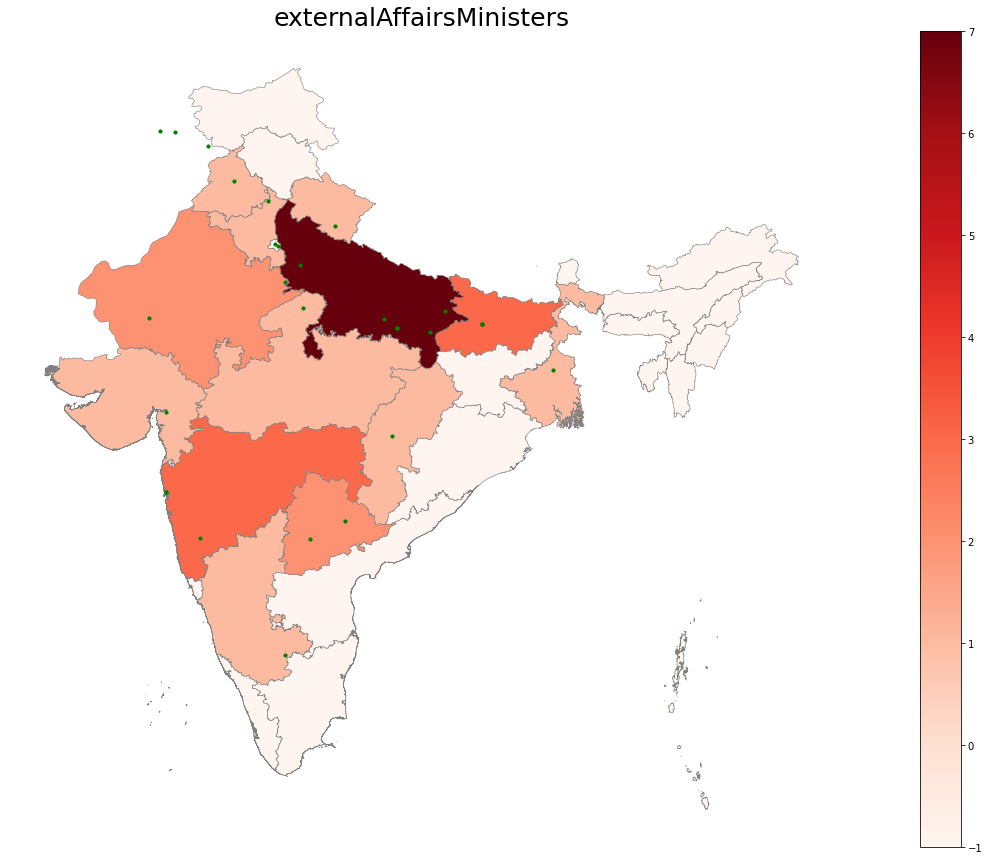

In [18]:
plt.rcParams['figure.figsize'] = [30, 15]
stateAnalysisMap(data,map_heading)

In [19]:
display(MarkerMap(data))

-------------------------------------------------- 
 externalAffairsMinisters 
 --------------------------------------------------


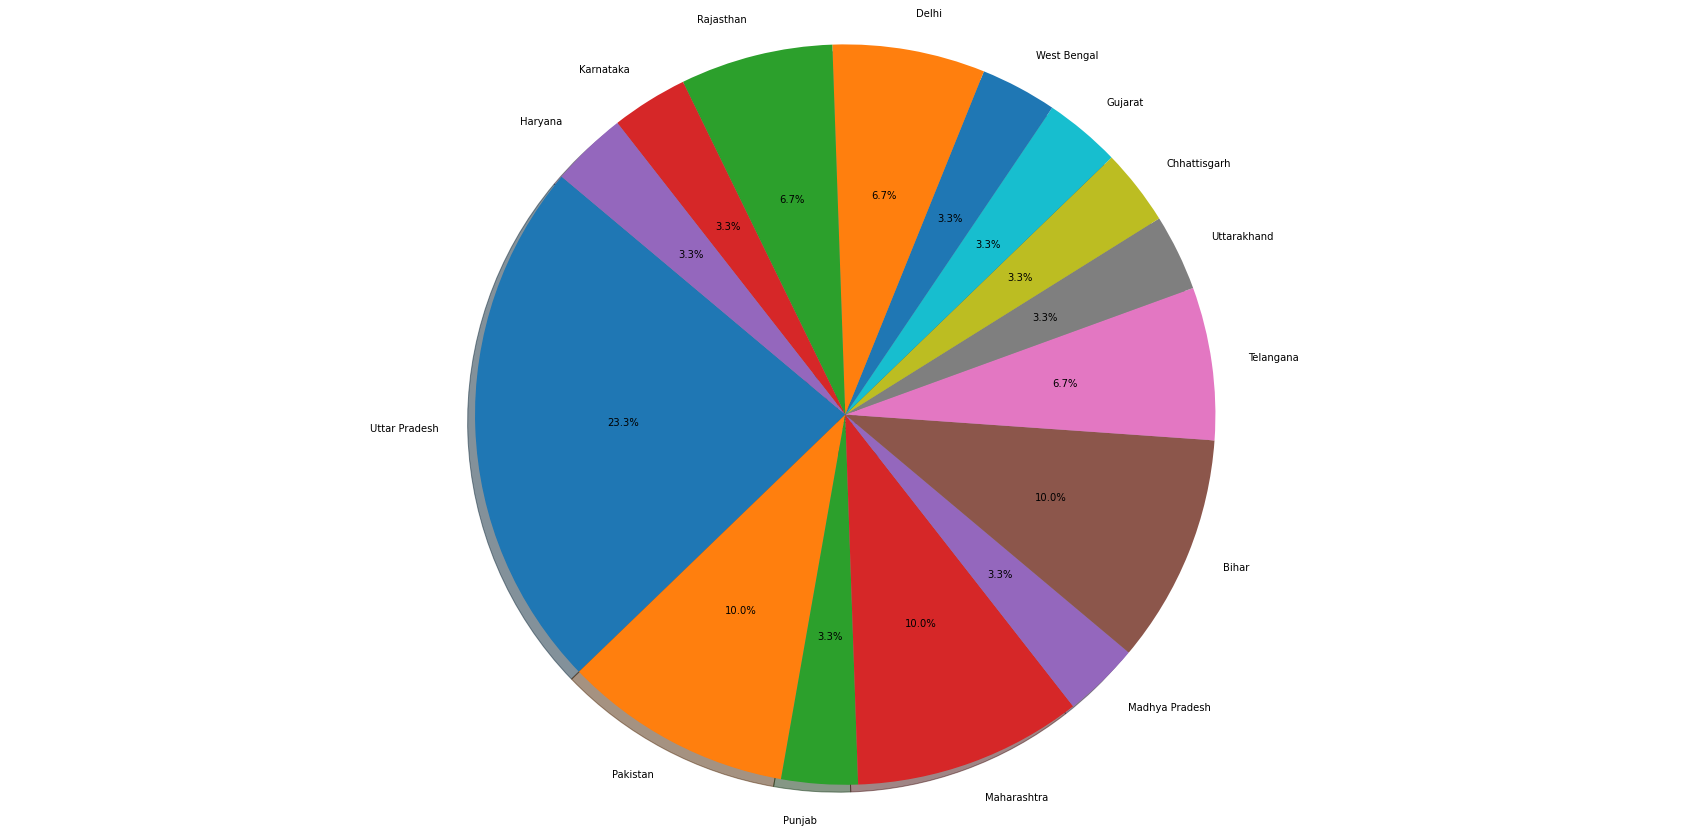

In [20]:
pie_data(data)

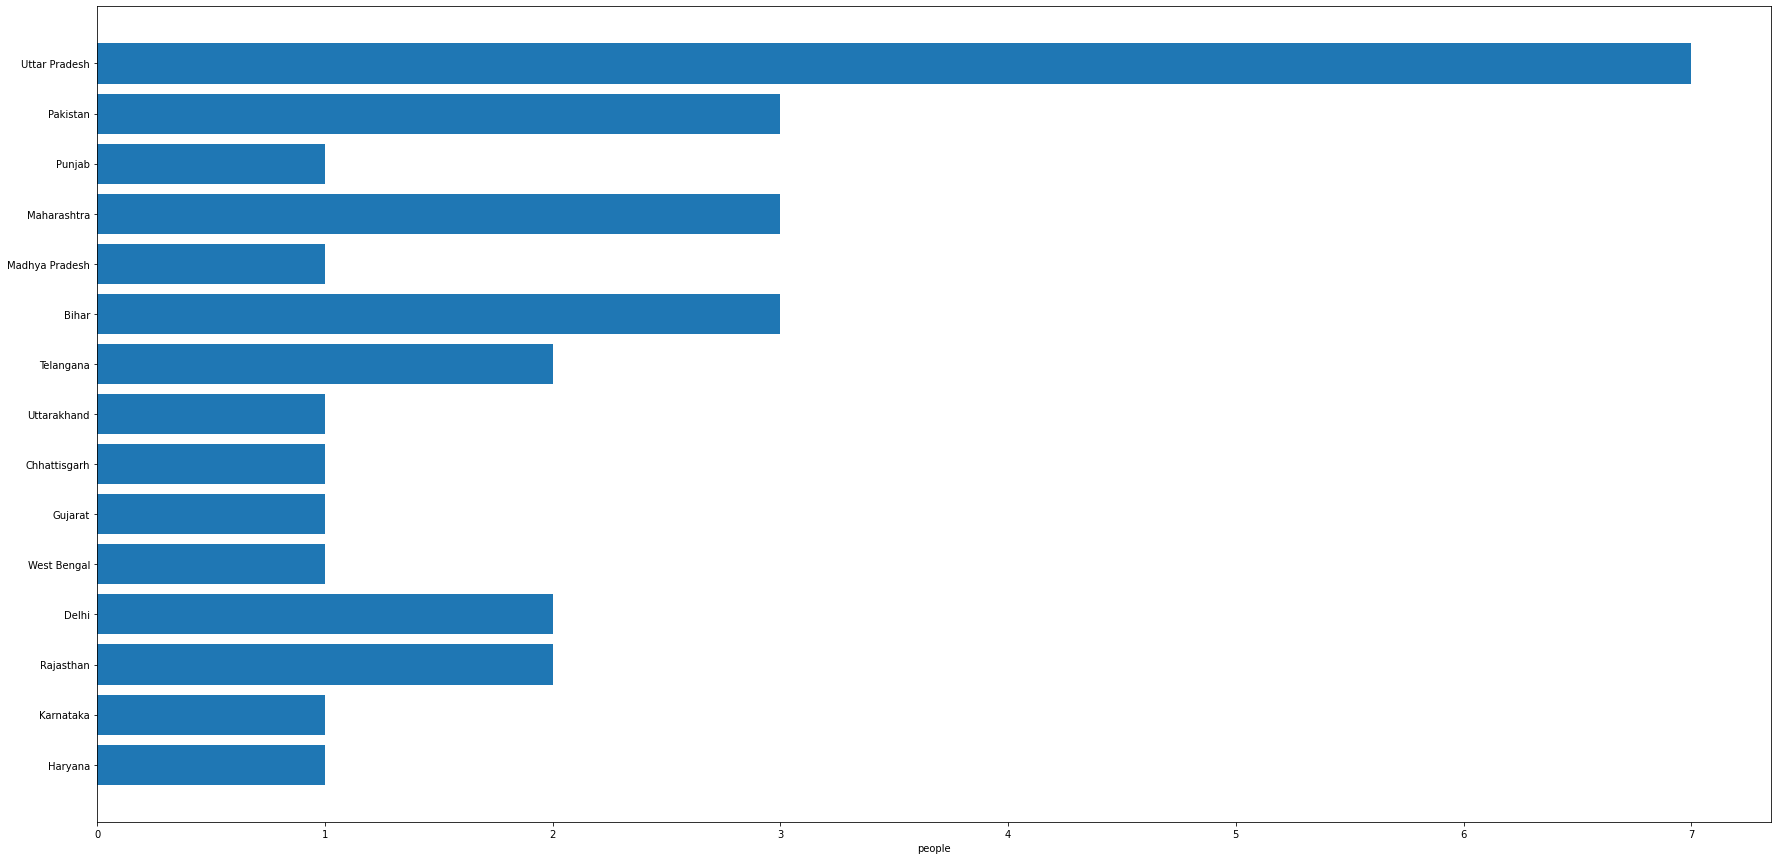

In [21]:
barGraph(data)